In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np



''' Format plots'''

fsize = 11
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['figure.dpi'] = 300


In [79]:

df = pd.read_csv(r'archive/noNaN_2022_demand.csv')

print(df['settlement_date'].head())

# df = df.drop(df[df['settlement_period'] > 48].index)
# df = df.dropna(subset=['tsd', 'nd', 'settlement_period'])




print(df['nd'].eq(0).any())


0    01/01/2022 00:00
1    01/01/2022 00:30
2    01/01/2022 01:00
3    01/01/2022 01:30
4    01/01/2022 02:00
Name: settlement_date, dtype: object
False


Text(0.5, 1.0, 'Histogram of Values')

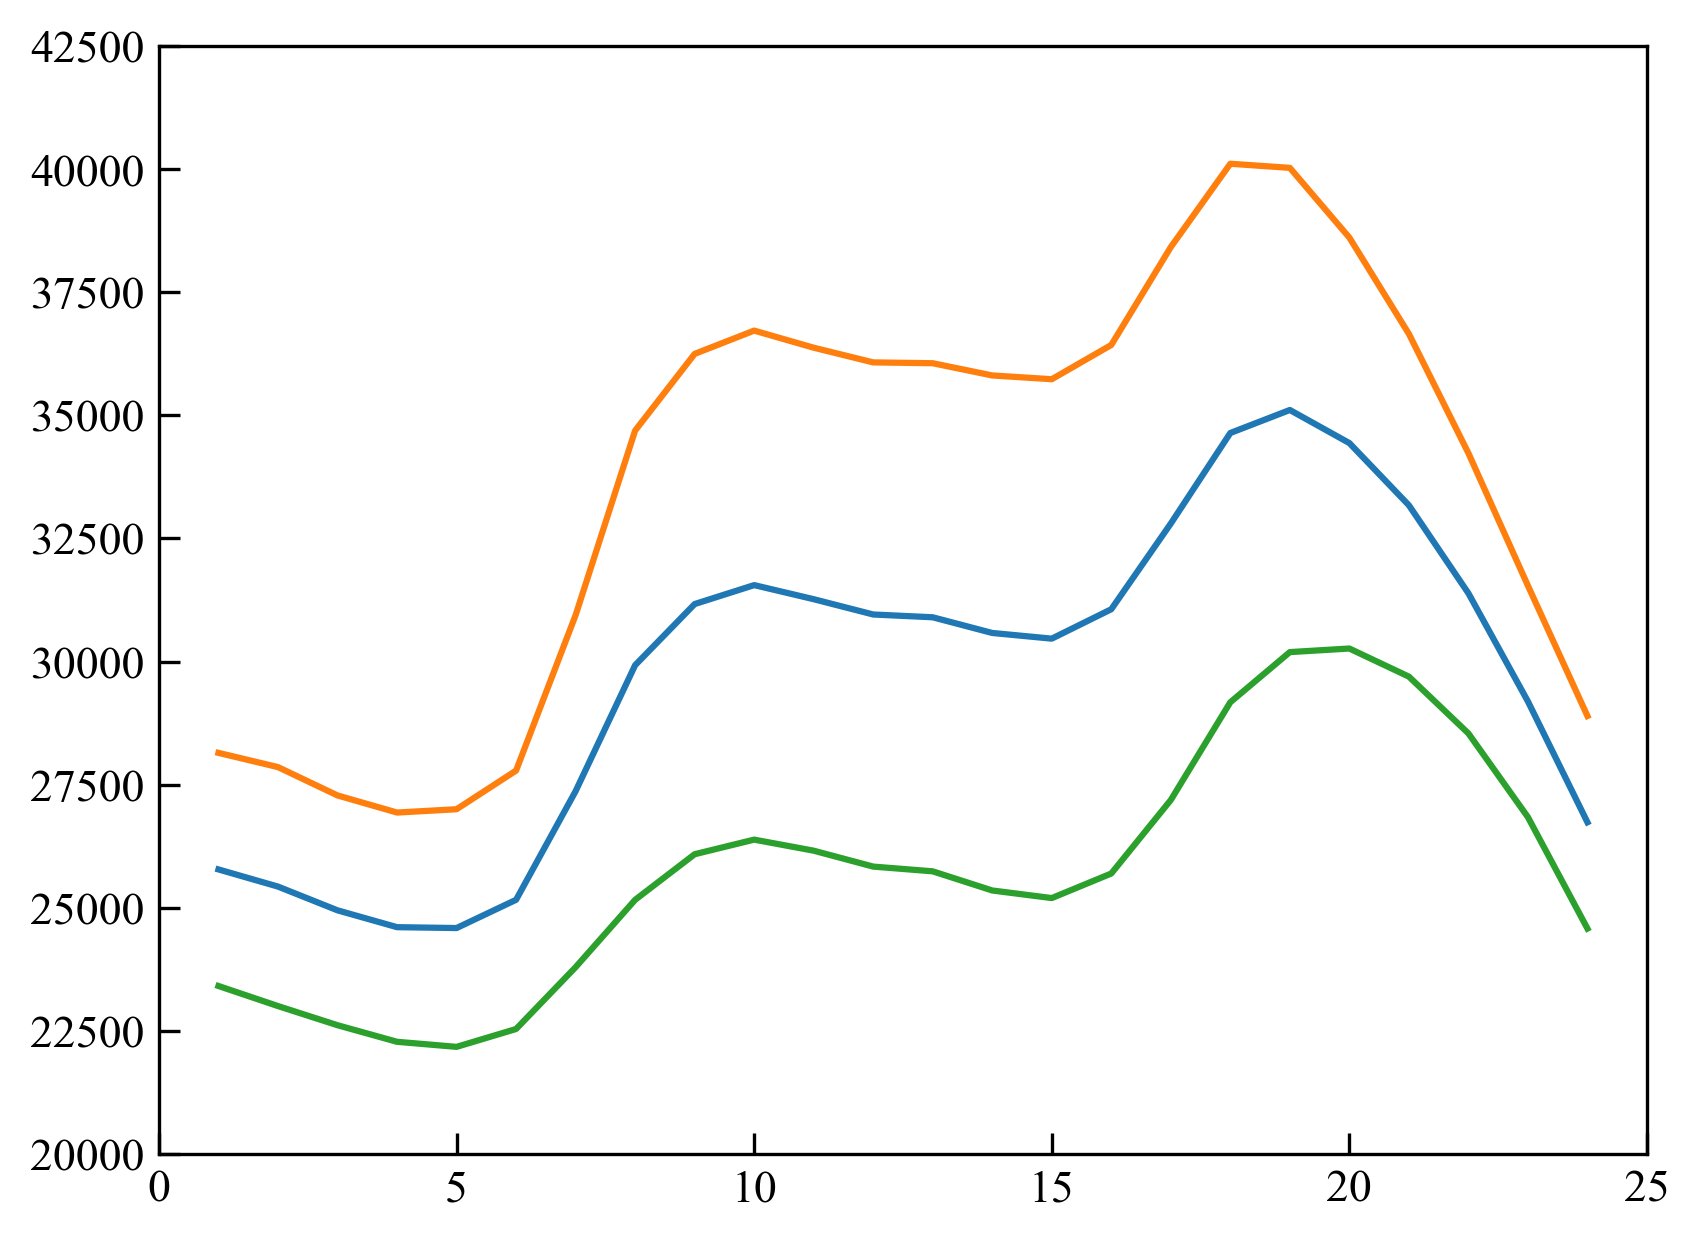

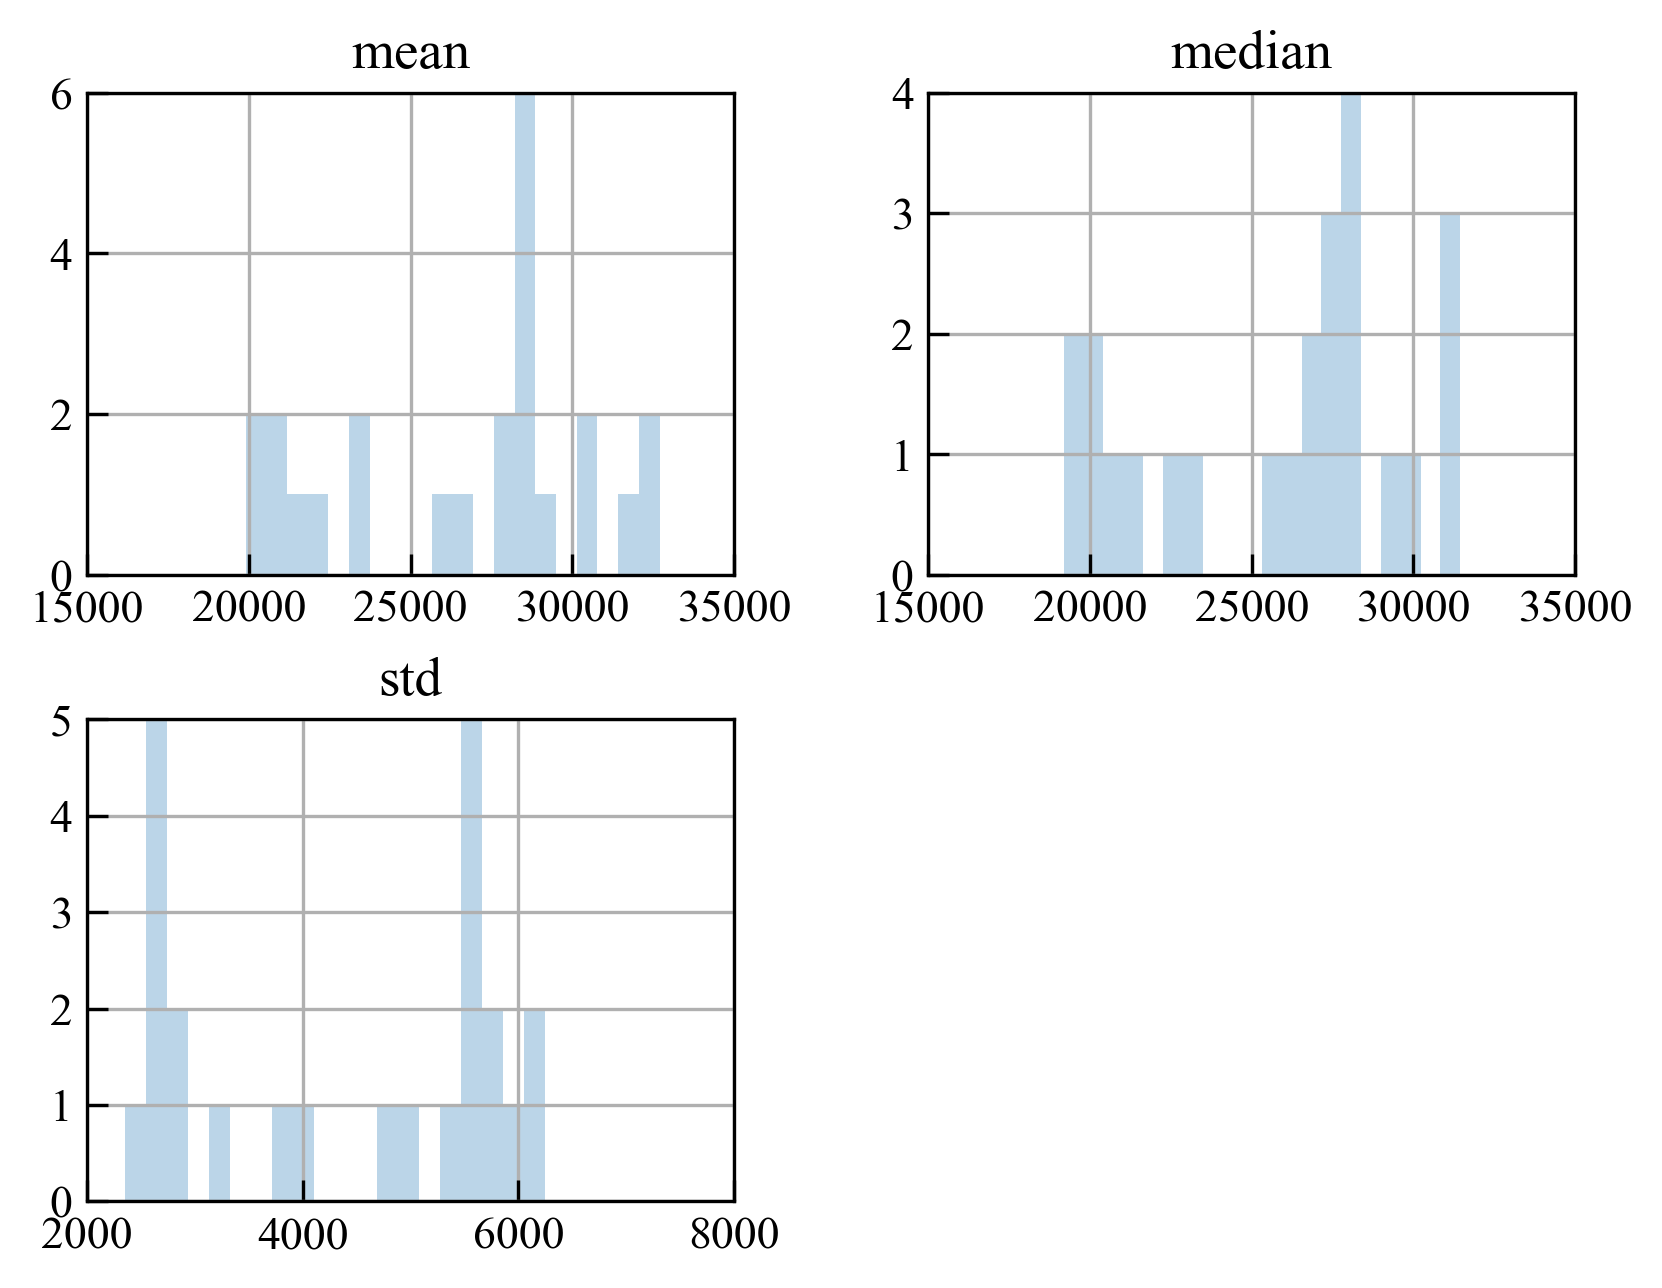

In [80]:


# Create a new column 'group' that groups every two rows
df['group'] = (df.index // 2)


#national demand plus embedded wind and solar
df['true_demand'] = df['nd'] + df['embedded_wind_generation'] + df['embedded_solar_generation']


# Use groupby to group the DataFrame by 'group', then compute the mean
df24 = df.groupby('group').mean()

# df24['nd'] = df24['nd'].apply(np.log)

df24['settlement_period'] = (df24['settlement_period'] + 0.5)/2


grouped_df = df24.groupby('settlement_period').agg(['mean', 'median', 'std'])

#print(grouped_df)



fig, ax = plt.subplots()

ax.plot(grouped_df['tsd']['mean'])
ax.plot(grouped_df['tsd']['mean'] + grouped_df['tsd']['std'])
ax.plot(grouped_df['tsd']['mean'] - grouped_df['tsd']['std'])


grouped_df['nd']['mean'].values

grouped_df['tsd']

grouped_df['nd'].hist(bins=20, alpha = 0.3)




# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')



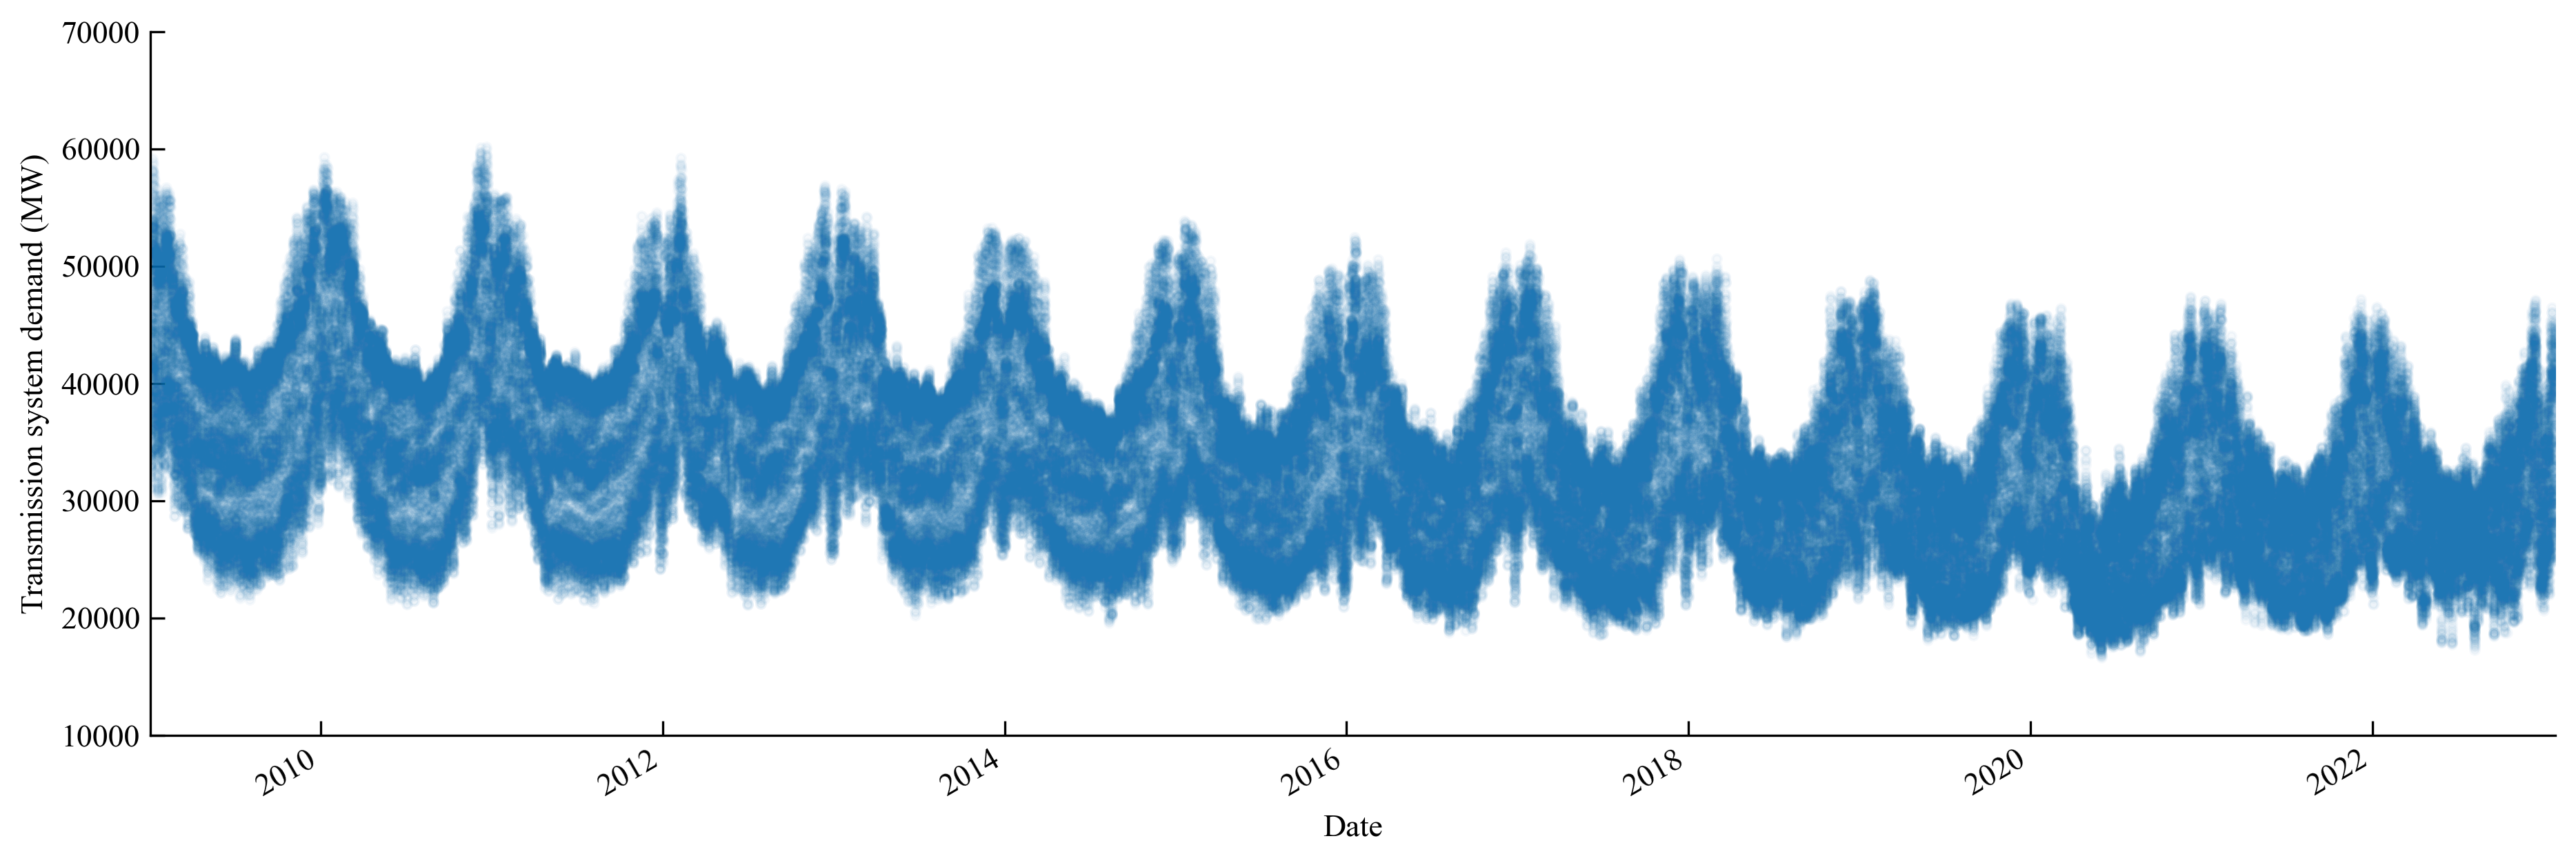

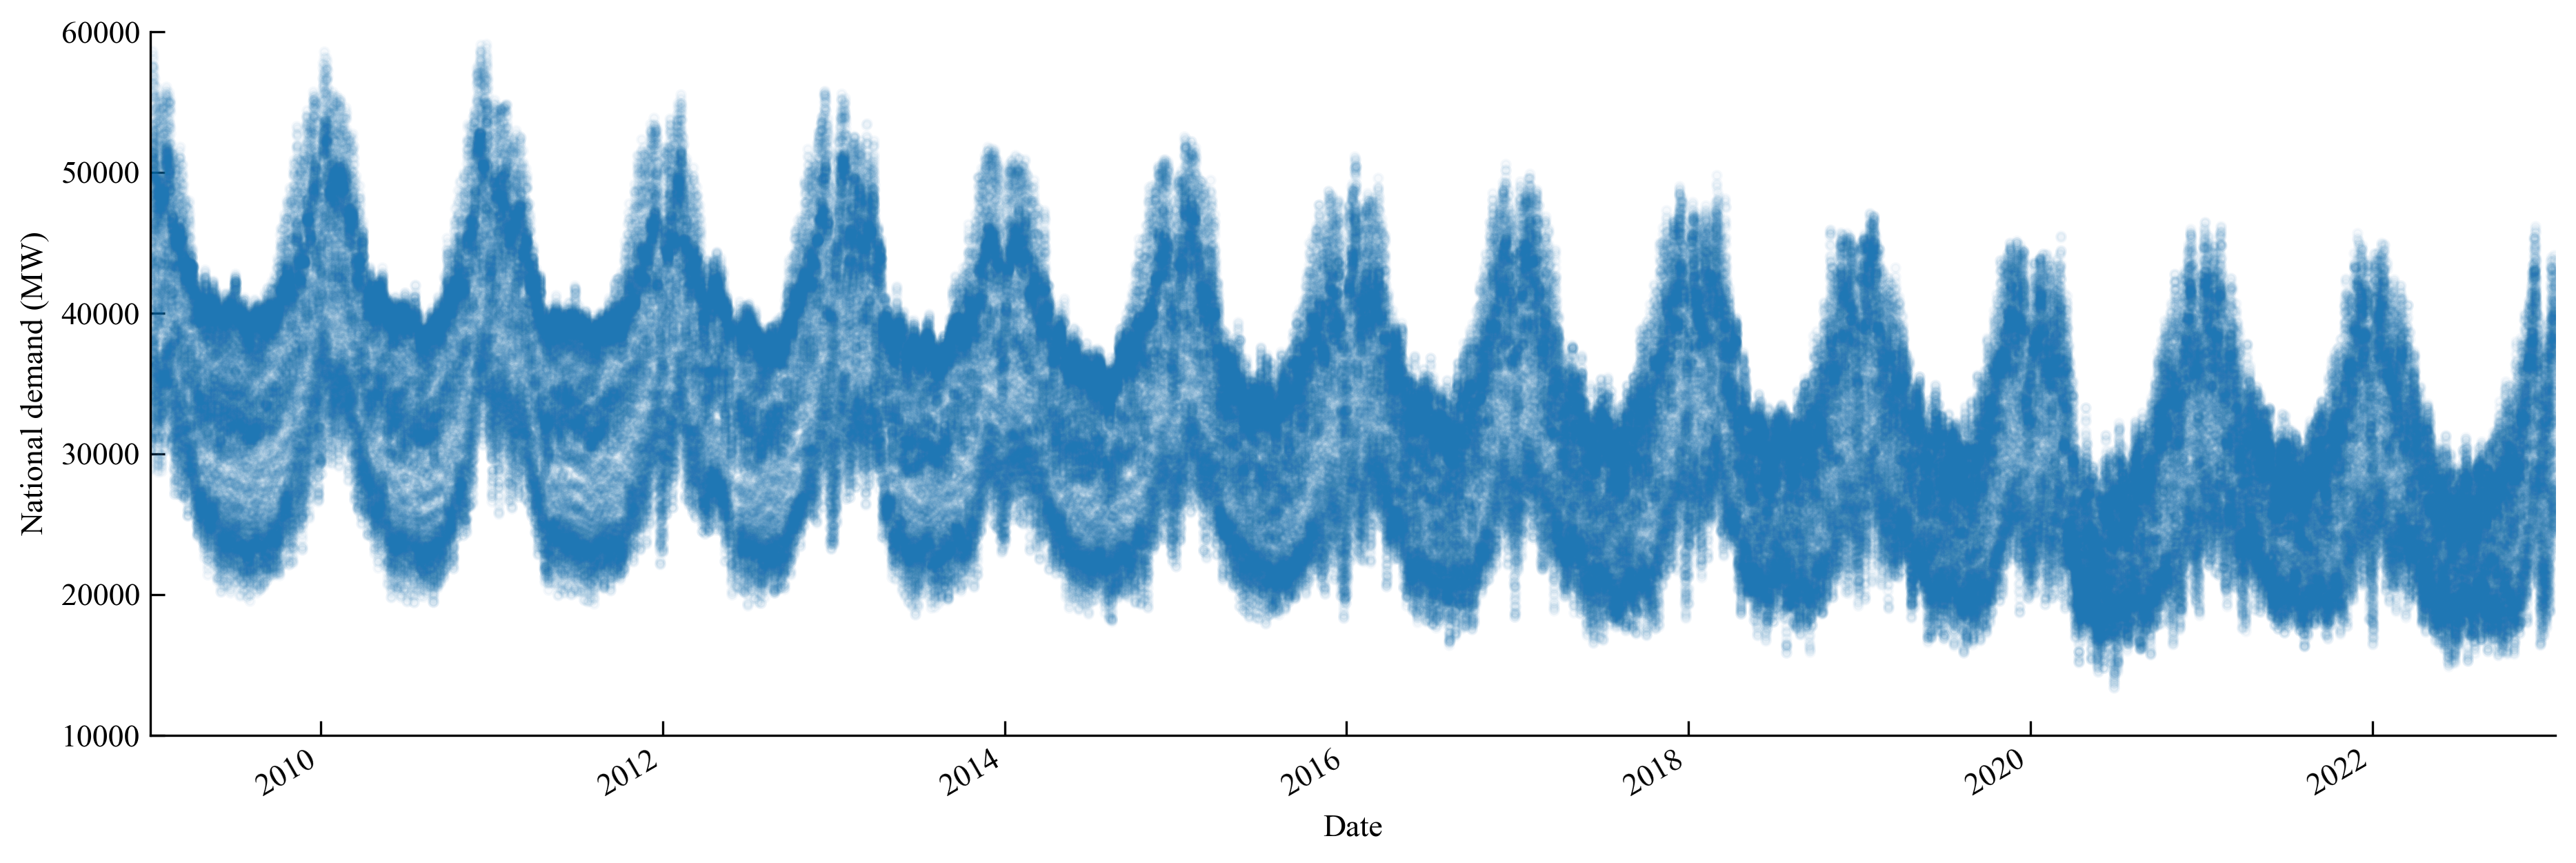

In [54]:
df_plot = df.copy()
df_plot = df_plot.set_index("settlement_date")
df_plot.index = pd.to_datetime(df_plot.index)

fig, ax = plt.subplots(figsize=(15, 5))
df_plot["tsd"].plot(
    style=".", ax=ax, alpha = 0.04
)
plt.ylabel('Transmission system demand (MW)')
plt.xlabel('Date')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
df_plot["nd"].plot(
    style=".", ax=ax, alpha = 0.04
)
plt.ylabel('National demand (MW)')
plt.xlabel('Date')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

plt.show()


# fig, ax = plt.subplots(figsize=(15, 5))
# df_plot["true_demand"].plot(
#     style=".", ax=ax, title="True demand", alpha = 0.04 
# )
# plt.show()




0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
Name: settlement_date, dtype: object
False
True
                           mean    median          std
settlement_period                                     
1.00               22220.099698  21450.00  2676.820368
1.50               19083.765625  19211.25   876.884211
2.00               21645.163664  20780.50  2817.057554
2.50               18630.531250  18831.00   850.541392
3.00               20931.378378  20169.50  2712.637388
3.50               17984.656250  18059.00   888.691494
4.00               20361.615964  19638.00  2649.101859
4.50               17645.300000  17781.00   931.432403
5.00               20104.246269  19460.50  2584.822198
5.50               17811.785714  17955.00  1112.286671
5.75               17154.000000  17154.00          NaN
6.00               20887.498512  20239.25  2863.535388
6.50               19426.444444  19784.00  1724.843869
6.75               22983.000000  22983.00  1272

Text(0.5, 1.0, 'Histogram of Values')

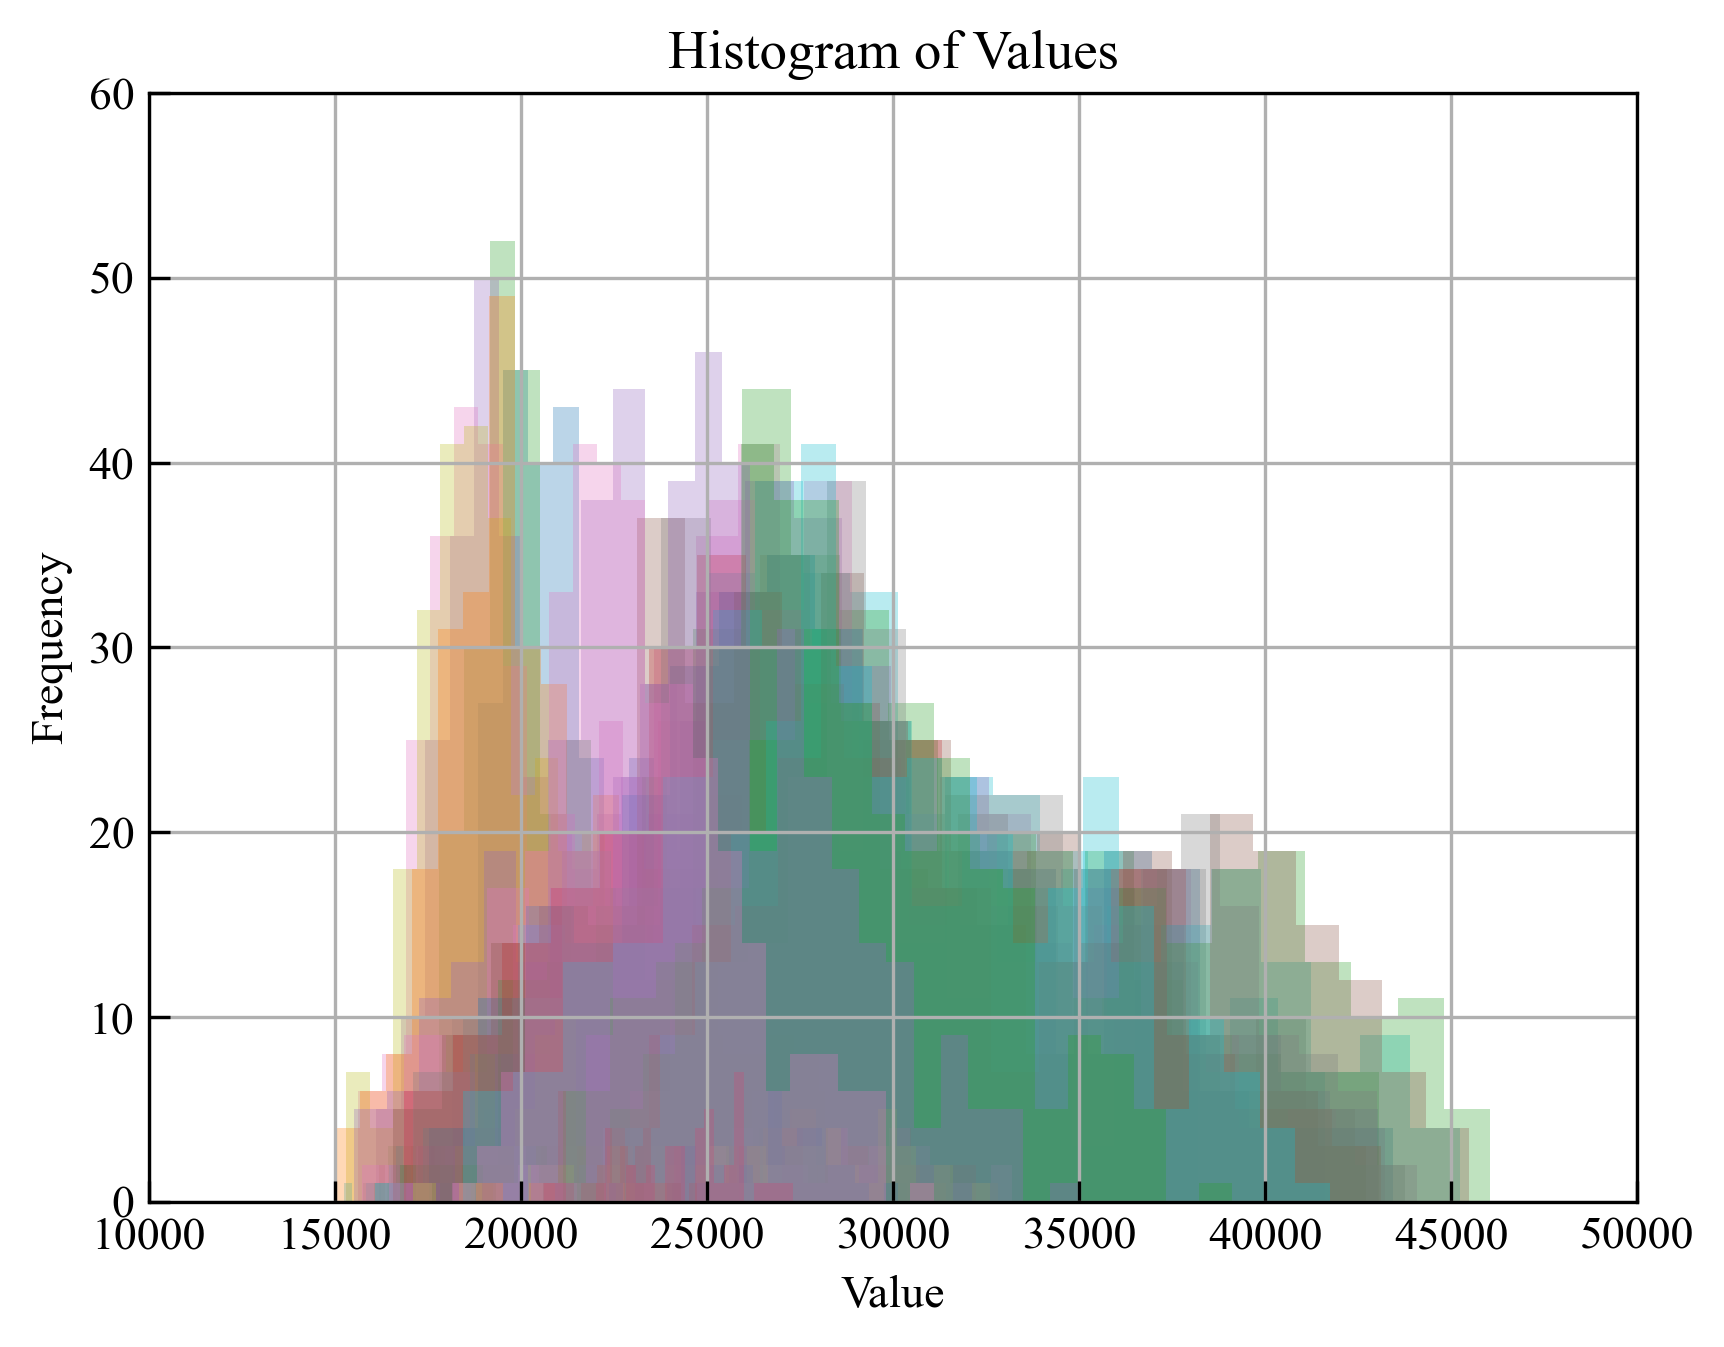

In [50]:

df = pd.read_csv(r'archive/historic_demand_year_2022.csv')

print(df['settlement_date'].head())

df = df.drop(df[df['settlement_period'] > 48].index)
df = df.dropna(subset=['tsd', 'nd', 'settlement_period'])




print(df['nd'].eq(0).any())

# Create a new column 'group' that groups every two rows
df['group'] = (df.index // 2)


#national demand plus embedded wind and solar
df['true_demand'] = df['nd'] + df['embedded_wind_generation'] + df['embedded_solar_generation']


# Use groupby to group the DataFrame by 'group', then compute the mean
df24 = df.groupby('group').mean()

# df24['nd'] = df24['nd'].apply(np.log)

df24['settlement_period'] = (df24['settlement_period'] + 0.5)/2


grouped_df = df24.groupby('settlement_period')


data_df = grouped_df['nd'].agg(['mean', 'median', 'std'])


print(data_df)

grouped_df['nd'].hist(bins=20, alpha = 0.3)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')



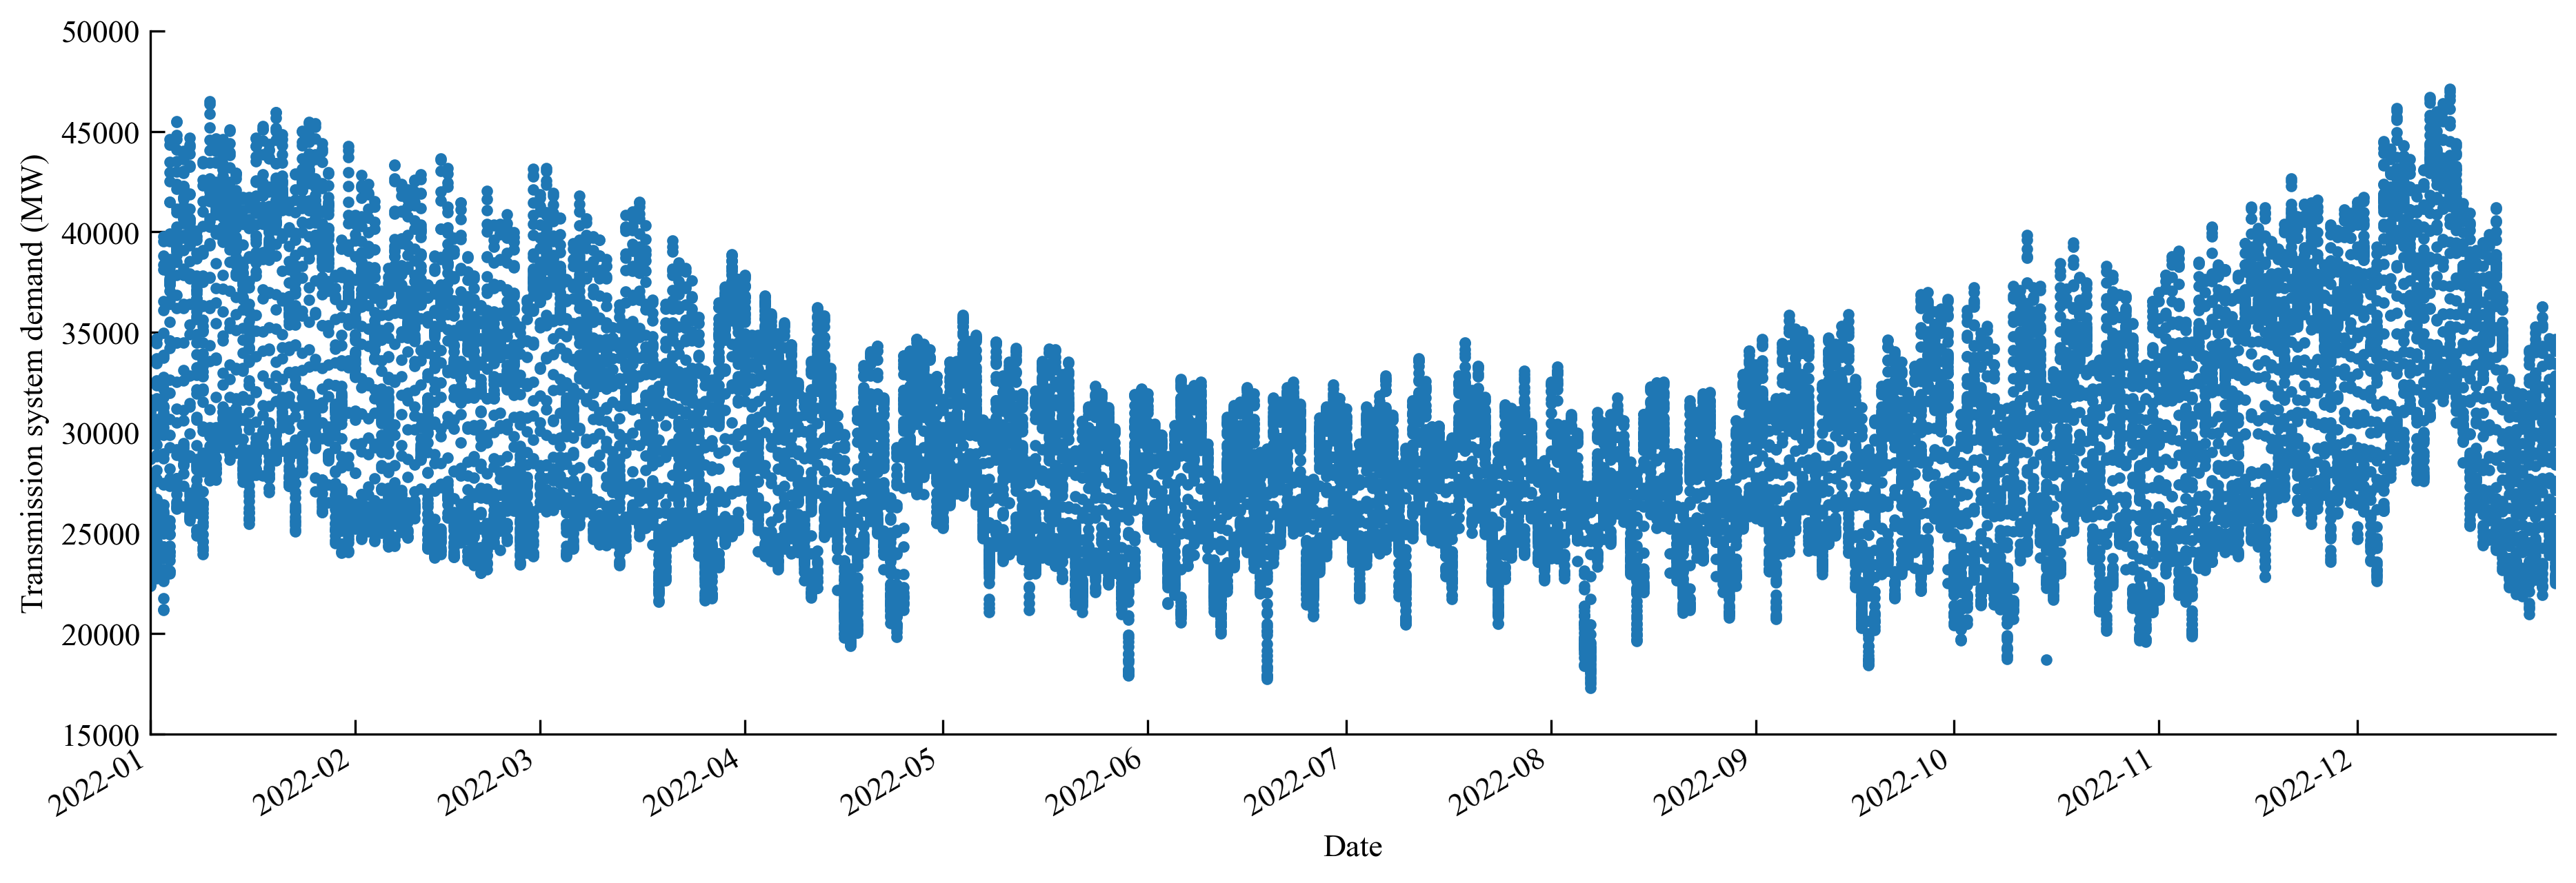

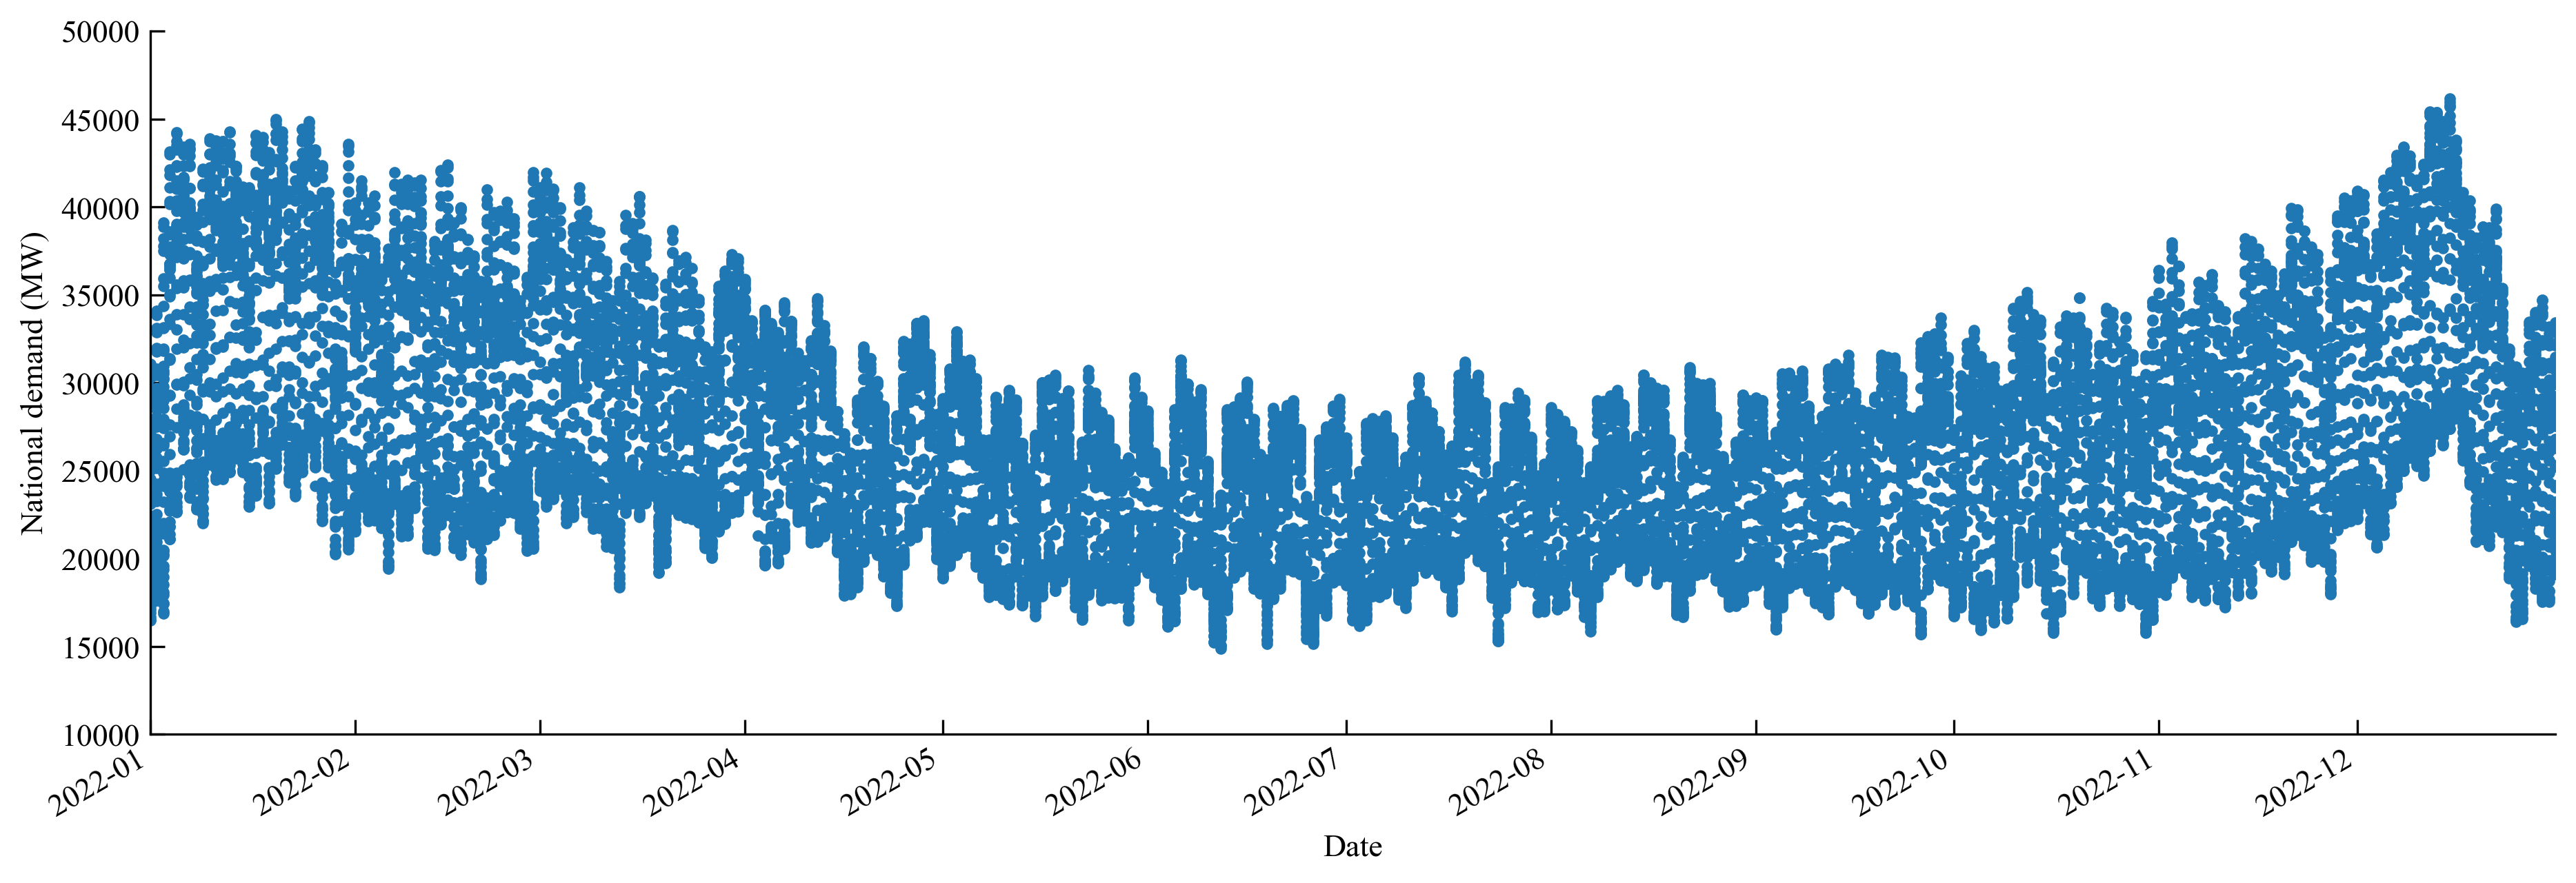

In [6]:
df_plot = df.copy()
df_plot = df_plot.set_index("settlement_date")
df_plot.index = pd.to_datetime(df_plot.index)

fig, ax = plt.subplots(figsize=(15, 5))
df_plot["tsd"].plot(
    style=".", ax=ax, alpha = 1
)
plt.ylabel('Transmission system demand (MW)')
plt.xlabel('Date')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
df_plot["nd"].plot(
    style=".", ax=ax, alpha = 1
)
plt.ylabel('National demand (MW)')
plt.xlabel('Date')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

plt.show()
